# Data Load


In [325]:
import numpy as np
import pandas as pd

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
#%matplotlib tk

#import matplotlib 
#matplotlib.font_manager._rebuild()

In [327]:
# 한글 폰트가 깨지면 실행하세요! 
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext='ttf')
# 아래 주석을 지워서 폰트 리스트를 확인하고 한글 폰트를 font_path에 추가합니다
fontlist[:]

from matplotlib import font_manager, rc
font_path = 'C:\\Users\\mtang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
#font_path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [328]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data.csv")

# original data -> data
data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


# EDA 

153395 rows X 31 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음) -> 군집화, labeling 필요
  - shop_type_big -> 13 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 367 category

- 매출 정보
  - date -> 12 category, 201702~ 201801 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보
  - weekday0~6 : 일 ~ 월
  - time -> 05_10 / 10_14 / 14_18 / 18_20 / 20_22 / 22_24 / 24_05 => 시간대가 동일하지 않음
    - 새벽대는 찾는 손님 적어 시간 길게 잡았을 것
    - 저녁 시간대는 가장 매출이 많이 이뤄지는 prime time 이라 시간대를 짧게 잡았을 것
  - female/male : 20/30/40/50 -> 8 columns

##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code는 input feature에 넣어야 하는가?
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [329]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price',
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50', 'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6', 'time_05_10',
       'time_10_14', 'time_14_18', 'time_18_20', 'time_20_22', 'time_22_24',
       'time_00_05'],
      dtype='object')

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153395 entries, 0 to 153394
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                153395 non-null  int64  
 1   shop_code           153395 non-null  int64  
 2   shop_name           153395 non-null  object 
 3   shop_type_big       148927 non-null  object 
 4   shop_type_small     148927 non-null  object 
 5   longitude           153395 non-null  float64
 6   latitude            153395 non-null  float64
 7   monthly_gain        153395 non-null  float64
 8   average_sale_price  153395 non-null  int64  
 9   female_20           153395 non-null  float64
 10  female_30           153395 non-null  float64
 11  female_40           153395 non-null  float64
 12  female_50           153395 non-null  float64
 13  male_20             153395 non-null  float64
 14  male_30             153395 non-null  float64
 15  male_40             153395 non-nul

# Preprocessing
- missing value 제거 
    - monthly_gain : 3,605 제거 -> 149,790
    - shop_type_big : 4,303 제거 -> 145,487 
    - gender feature : 1,187 제거 -> 144,300
- shop_code, shop_name : 식별자 feature 이므로 drop 
- date : 아직은 쓸 수 없으므로 drop
    - 여기까지 총 144,300 X 27
- shop_type_big(13), shop_type_small(367) : label encodding
- longitude, latitude : clustering을 통해 labeling 후 해당 두 열은 drop 
- MinMaxSaclar 정규화 -> 정규화 column의 범위는??

In [415]:
# 원본 data와 따로 관리 -> original data = data, input data = input_data 
# feature drop
input_data = data.copy()
input_data = input_data.drop(['date', 'shop_code', 'shop_name'], axis=1)

#input_data

In [416]:
# missing value drop - monthly_gain
null_index = input_data[input_data['monthly_gain']==0].index 
#print(len(drop_index)) -> 3605
input_data = input_data.drop(null_index)

#input_data

In [417]:
# missing value drop - shop_type_big
null_index = input_data[input_data['shop_type_big'].isnull()==True].index
input_data = input_data.drop(null_index)

#input_data

In [418]:
# There is no "null" in "shop_type_small" feature 
print(len(input_data['shop_type_small'].unique()))
print(input_data['shop_type_small'].isnull().value_counts())

367
False    145487
Name: shop_type_small, dtype: int64


In [419]:
# missing value drop - gender feature 
# So we finally get 144,300 x 28 data 
null_index = input_data[input_data[['female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50']].sum(axis=1)==0].index
input_data = input_data.drop(null_index).reset_index().drop('index', axis=1)

input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,5.43,18.68,4.63,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,12.12,9.68,8.15,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,9.64,4.05,3.57,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,11.48,6.31,4.77,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,10.48,16.90,9.56,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,0.00,25.35,22.82,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
144296,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,0.00,46.48,44.72,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
144297,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,14.62,9.13,2.91,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
144298,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,18.09,9.60,9.93,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [420]:
# issue -> shop_type_big에 관한 2번째 issue를 참고하세요!
# issue -> '음식'과 '음식 ' 두 개로 count 되고 있습니다. 아래 코드로 수정하시길 바랍니다
input_data.loc[input_data['shop_type_big'] == '음식 ', 'shop_type_big'] = '음식'
print(input_data['shop_type_big'].nunique())
print(input_data['shop_type_big'].unique())

13
['음식' '소매' '의료' '숙박' '관광/여가/오락' '학문/교육' '생활서비스' '스포츠' '도매/유통/무역' '제조'
 '부동산' '전자/정보통신' '기술서비스']


In [421]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input_data['shop_type_big'] = le.fit_transform(list(input_data['shop_type_big']))   # fit transform으로 한번에 처리 가능
#le.classes_

le = LabelEncoder()
input_data['shop_type_small'] = le.fit_transform(list(input_data['shop_type_small'])) 
#le.classes_

In [422]:
# Labeling - KMeans Clustering 
# longitude + latitude = geo 
# So we get inpute_data = 144,300 X 27
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9).fit(input_data[['latitude', 'longitude']])
print(kmeans.cluster_centers_)
print(kmeans.labels_)

input_data['geo'] = kmeans.labels_
input_data = input_data.drop(['longitude', 'latitude'], axis=1)

input_data

[[ 37.55455088 126.92418659]
 [ 37.50237517 127.0257712 ]
 [ 37.56303222 126.98415949]
 [ 37.5257224  127.03890767]
 [ 37.56771376 127.00856117]
 [ 37.51695789 126.90563168]
 [ 37.51137329 127.05951703]
 [ 37.52161687 127.02414534]
 [ 37.51214286 127.10026933]]
[0 1 1 ... 6 8 8]


,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9982,9.58,5.43,18.68,4.63,27.62,8.89,...,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00,0
1,8,346,8.496120e+06,14503,5.08,12.12,9.68,8.15,9.68,9.75,...,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00,1
2,8,17,1.036515e+08,72527,10.51,9.64,4.05,3.57,23.30,31.56,...,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89,1
3,8,17,9.678575e+07,70225,12.10,11.48,6.31,4.77,15.64,30.60,...,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45,1
4,5,170,1.266359e+08,91884,15.04,10.48,16.90,9.56,21.64,11.67,...,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,1114250,0.00,0.00,25.35,22.82,0.00,26.48,...,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00,3
144296,5,357,1.555300e+06,33556,0.00,0.00,46.48,44.72,0.00,0.00,...,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00,3
144297,5,257,3.134106e+08,39543,31.27,14.62,9.13,2.91,19.56,12.47,...,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00,6
144298,9,190,7.927725e+07,9874,23.15,18.09,9.60,9.93,11.81,10.03,...,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00,8


In [423]:
# Normalization - average_sale_price 
# 업종별 분류 없이 다같이 log 정규화
# robust, minmax, standard, normalizer보다 log1p 일 때 가장 정규분포와 가까운 모양을 띄움
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

scale_cols = ['average_sale_price']

scaled_data = pd.DataFrame(np.log1p(input_data[scale_cols]))
input_data[scale_cols] = scaled_data

input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9.208639,9.58,5.43,18.68,4.63,27.62,8.89,...,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00,0
1,8,346,8.496120e+06,9.582180,5.08,12.12,9.68,8.15,9.68,9.75,...,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00,1
2,8,17,1.036515e+08,11.191728,10.51,9.64,4.05,3.57,23.30,31.56,...,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89,1
3,8,17,9.678575e+07,11.159474,12.10,11.48,6.31,4.77,15.64,30.60,...,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45,1
4,5,170,1.266359e+08,11.428293,15.04,10.48,16.90,9.56,21.64,11.67,...,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,13.923693,0.00,0.00,25.35,22.82,0.00,26.48,...,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00,3
144296,5,357,1.555300e+06,10.421001,0.00,0.00,46.48,44.72,0.00,0.00,...,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00,3
144297,5,257,3.134106e+08,10.585169,31.27,14.62,9.13,2.91,19.56,12.47,...,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00,6
144298,9,190,7.927725e+07,9.197762,23.15,18.09,9.60,9.93,11.81,10.03,...,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00,8


In [298]:
# Normalization - average_sale_price
# 업종별(shop_type_big)로 log1p 함수 적용
scale_range = input_data['shop_type_big'].nunique()
for s in range(0, scale_range) : 
    scale_data = pd.DataFrame(input_data[input_data['shop_type_big'] == s]['average_sale_price'])
    scaled_data = pd.DataFrame(np.log1p(scale_data))
    input_data.loc[scale_data.index, 'average_sale_price'] = scaled_data
    
input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9.208639,9.58,5.43,18.68,4.63,27.62,8.89,...,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00,0
1,8,346,8.496120e+06,9.582180,5.08,12.12,9.68,8.15,9.68,9.75,...,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00,3
2,8,17,1.036515e+08,11.191728,10.51,9.64,4.05,3.57,23.30,31.56,...,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89,3
3,8,17,9.678575e+07,11.159474,12.10,11.48,6.31,4.77,15.64,30.60,...,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45,3
4,5,170,1.266359e+08,11.428293,15.04,10.48,16.90,9.56,21.64,11.67,...,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,13.923693,0.00,0.00,25.35,22.82,0.00,26.48,...,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00,4
144296,5,357,1.555300e+06,10.421001,0.00,0.00,46.48,44.72,0.00,0.00,...,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00,4
144297,5,257,3.134106e+08,10.585169,31.27,14.62,9.13,2.91,19.56,12.47,...,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00,8
144298,9,190,7.927725e+07,9.197762,23.15,18.09,9.60,9.93,11.81,10.03,...,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00,7


In [424]:
# Normalization - gender, week, time, 다같이 
scaler = MinMaxScaler()

scale_cols = ['female_20', 'female_30', 'female_40', 'female_50', 'male_20', 'male_30', 'male_40', 'male_50',
             'time_05_10', 'time_10_14', 'time_14_18','time_18_20', 'time_20_22', 'time_22_24', 'time_00_05',
             'weekday0', 'weekday1', 'weekday2','weekday3', 'weekday4', 'weekday5', 'weekday6']

scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(np.log1p(input_data[scale_cols]))
input_data[scale_cols] = scaled_data
input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9.208639,0.0958,0.0543,0.1868,0.046295,0.2762,0.0889,...,0.1192,0.0634,0.0115,0.7278,0.2314,0.0293,0.0000,0.0000,0.0000,0
1,8,346,8.496120e+06,9.582180,0.0508,0.1212,0.0968,0.081492,0.0968,0.0975,...,0.1635,0.1082,0.0083,0.7682,0.1325,0.0909,0.0000,0.0000,0.0000,1
2,8,17,1.036515e+08,11.191728,0.1051,0.0964,0.0405,0.035696,0.2330,0.3156,...,0.2159,0.1804,0.0464,0.0850,0.0240,0.1867,0.5005,0.0984,0.0589,1
3,8,17,9.678575e+07,11.159474,0.1210,0.1148,0.0631,0.047695,0.1564,0.3060,...,0.2260,0.1551,0.0268,0.0809,0.0577,0.1015,0.5461,0.1625,0.0245,1
4,5,170,1.266359e+08,11.428293,0.1504,0.1048,0.1690,0.095590,0.2164,0.1167,...,0.1038,0.2271,0.0043,0.2638,0.3920,0.2530,0.0869,0.0000,0.0000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,13.923693,0.0000,0.0000,0.2535,0.228177,0.0000,0.2648,...,0.0000,0.0000,0.7352,0.2648,0.0000,0.0000,0.0000,0.0000,0.0000,3
144296,5,357,1.555300e+06,10.421001,0.0000,0.0000,0.4648,0.447155,0.0000,0.0000,...,0.2318,0.2053,0.2318,0.5265,0.1358,0.1060,0.0000,0.0000,0.0000,3
144297,5,257,3.134106e+08,10.585169,0.3127,0.1462,0.0913,0.029097,0.1956,0.1247,...,0.1371,0.1384,0.0660,0.4494,0.3645,0.1201,0.0000,0.0000,0.0000,6
144298,9,190,7.927725e+07,9.197762,0.2315,0.1809,0.0960,0.099290,0.1181,0.1003,...,0.1171,0.1684,0.0445,0.2570,0.3000,0.2270,0.1661,0.0055,0.0000,8


In [357]:
# Normalization - gender, week, time 각자 
scaler = MinMaxScaler()

scale_cols = ['shop_type_big', 'shop_type_small']

scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(np.log1p(input_data[scale_cols]))
input_data[scale_cols] = scaled_data
input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,0.666667,0.839779,5.696400e+06,9.208639,0.0958,0.0543,0.1868,0.046295,0.2762,0.0889,...,0.1192,0.0634,0.0115,0.7278,0.2314,0.0293,0.0000,0.0000,0.0000,0
1,0.666667,0.955801,8.496120e+06,9.582180,0.0508,0.1212,0.0968,0.081492,0.0968,0.0975,...,0.1635,0.1082,0.0083,0.7682,0.1325,0.0909,0.0000,0.0000,0.0000,4
2,0.666667,0.046961,1.036515e+08,11.191728,0.1051,0.0964,0.0405,0.035696,0.2330,0.3156,...,0.2159,0.1804,0.0464,0.0850,0.0240,0.1867,0.5005,0.0984,0.0589,4
3,0.666667,0.046961,9.678575e+07,11.159474,0.1210,0.1148,0.0631,0.047695,0.1564,0.3060,...,0.2260,0.1551,0.0268,0.0809,0.0577,0.1015,0.5461,0.1625,0.0245,4
4,0.416667,0.469613,1.266359e+08,11.428293,0.1504,0.1048,0.1690,0.095590,0.2164,0.1167,...,0.1038,0.2271,0.0043,0.2638,0.3920,0.2530,0.0869,0.0000,0.0000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,1.000000,0.892265,2.277527e+07,13.923693,0.0000,0.0000,0.2535,0.228177,0.0000,0.2648,...,0.0000,0.0000,0.7352,0.2648,0.0000,0.0000,0.0000,0.0000,0.0000,3
144296,0.416667,0.986188,1.555300e+06,10.421001,0.0000,0.0000,0.4648,0.447155,0.0000,0.0000,...,0.2318,0.2053,0.2318,0.5265,0.1358,0.1060,0.0000,0.0000,0.0000,3
144297,0.416667,0.709945,3.134106e+08,10.585169,0.3127,0.1462,0.0913,0.029097,0.1956,0.1247,...,0.1371,0.1384,0.0660,0.4494,0.3645,0.1201,0.0000,0.0000,0.0000,8
144298,0.750000,0.524862,7.927725e+07,9.197762,0.2315,0.1809,0.0960,0.099290,0.1181,0.1003,...,0.1171,0.1684,0.0445,0.2570,0.3000,0.2270,0.1661,0.0055,0.0000,7


In [299]:
scaler = MinMaxScaler()

scale_cols = ['female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50']

scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(np.log1p(input_data[scale_cols]))
input_data[scale_cols] = scaled_data
#input_data

In [300]:
scaler = MinMaxScaler()

scale_cols = ['time_05_10', 'time_10_14', 'time_14_18',
            'time_18_20', 'time_20_22', 'time_22_24', 'time_00_05']

scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(np.log1p(input_data[scale_cols]))
input_data[scale_cols] = scaled_data
#input_data

In [301]:
scaler = MinMaxScaler()

scale_cols = ['weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6']

scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(np.log1p(input_data[scale_cols]))
input_data[scale_cols] = scaled_data
input_data

,shop_type_big,shop_type_small,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,male_20,male_30,...,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05,geo
0,8,304,5.696400e+06,9.208639,0.0958,0.0543,0.1868,0.046295,0.2762,0.0889,...,0.1192,0.0634,0.0115,0.7278,0.2314,0.0293,0.0000,0.0000,0.0000,0
1,8,346,8.496120e+06,9.582180,0.0508,0.1212,0.0968,0.081492,0.0968,0.0975,...,0.1635,0.1082,0.0083,0.7682,0.1325,0.0909,0.0000,0.0000,0.0000,3
2,8,17,1.036515e+08,11.191728,0.1051,0.0964,0.0405,0.035696,0.2330,0.3156,...,0.2159,0.1804,0.0464,0.0850,0.0240,0.1867,0.5005,0.0984,0.0589,3
3,8,17,9.678575e+07,11.159474,0.1210,0.1148,0.0631,0.047695,0.1564,0.3060,...,0.2260,0.1551,0.0268,0.0809,0.0577,0.1015,0.5461,0.1625,0.0245,3
4,5,170,1.266359e+08,11.428293,0.1504,0.1048,0.1690,0.095590,0.2164,0.1167,...,0.1038,0.2271,0.0043,0.2638,0.3920,0.2530,0.0869,0.0000,0.0000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144295,12,323,2.277527e+07,13.923693,0.0000,0.0000,0.2535,0.228177,0.0000,0.2648,...,0.0000,0.0000,0.7352,0.2648,0.0000,0.0000,0.0000,0.0000,0.0000,4
144296,5,357,1.555300e+06,10.421001,0.0000,0.0000,0.4648,0.447155,0.0000,0.0000,...,0.2318,0.2053,0.2318,0.5265,0.1358,0.1060,0.0000,0.0000,0.0000,4
144297,5,257,3.134106e+08,10.585169,0.3127,0.1462,0.0913,0.029097,0.1956,0.1247,...,0.1371,0.1384,0.0660,0.4494,0.3645,0.1201,0.0000,0.0000,0.0000,8
144298,9,190,7.927725e+07,9.197762,0.2315,0.1809,0.0960,0.099290,0.1181,0.1003,...,0.1171,0.1684,0.0445,0.2570,0.3000,0.2270,0.1661,0.0055,0.0000,7


<AxesSubplot:xlabel='shop_type_big', ylabel='average_sale_price'>

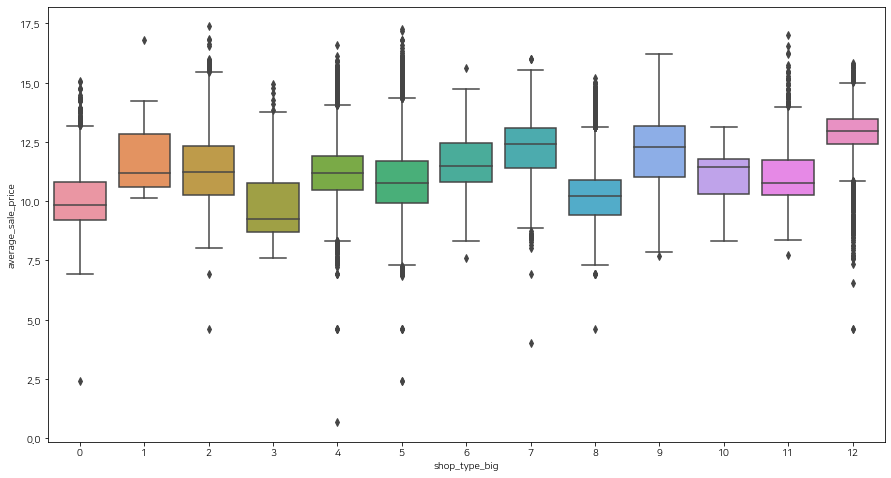

In [19]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='average_sale_price', data=input_data)

C:\Users\mtang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10.308986    336
10.819798    333
9.903538     289
11.512935    262
10.596660    237
            ... 
11.188566      1
12.031052      1
12.314290      1
9.382612       1
10.071330      1
Name: average_sale_price, Length: 79694, dtype: int64


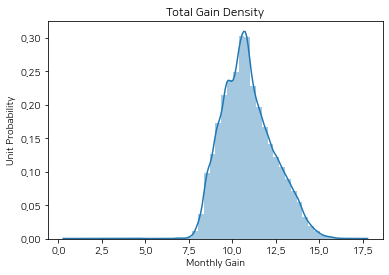

In [276]:
ax = plt.subplots()
ax = sns.distplot(input_data['average_sale_price'], hist=True)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['average_sale_price'].value_counts())

C:\Users\mtang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.000000    30443
0.577350     1497
0.408248       44
0.353553       29
0.516413       19
            ...  
0.086788        1
0.073465        1
0.021390        1
0.237575        1
0.350205        1
Name: female_50, Length: 111686, dtype: int64


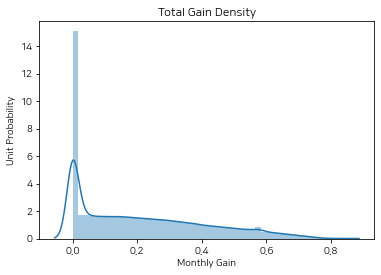

In [402]:
ax = plt.subplots()
ax = sns.distplot(input_data['female_20'], hist=True)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['female_50'].value_counts())

# Modeling
- XGB
- LGBM
- K-Fold Cross Validation (k=5)

In [425]:
input_data_y = input_data['monthly_gain'].copy()
input_data_X = input_data.drop(['monthly_gain'], axis=1)
#input_data_y = scaler.inverse_transform(pd.DataFrame(input_data_y))

In [426]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from lightgbm import plot_importance 
from xgboost import XGBRegressor
from xgboost import plot_importance

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [427]:
tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)  

In [428]:
model_xgb = XGBRegressor()
model_lgbm = LGBMRegressor()

In [429]:
scaled_data = pd.DataFrame(np.log1p(tr_val_y))
tr_val_y = scaled_data

tr_val_y

,monthly_gain
137020,12.554089
49613,12.638021
84843,17.201373
56266,17.895093
116750,12.625444
...,...
110268,15.962248
119879,14.919078
103694,19.796054
131932,17.196096


In [430]:
kfold = KFold(n_splits=5, shuffle=True, random_state = 7)
cv_accuracy = []
n_iter =0

for train_index, test_index in kfold.split(tr_val_X):  # 데이터를 kfold = 5 로 분할
    x_train, x_test = tr_val_X.iloc[list(train_index)], tr_val_X.iloc[list(test_index)]
    y_train, y_test = tr_val_y.iloc[list(train_index)], tr_val_y.iloc[list(test_index)]
    
    model_xgb.fit(x_train, y_train)
    pred = model_xgb.predict(x_test)
    n_iter += 1
    
    mse = np.round(mean_squared_error(y_test, pred), 4) # 소수점 4자리 반올림
    rmse = np.sqrt(mse)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 rmse : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, rmse, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
    
print('\n## 평균 검증 rmse:', np.mean(cv_accuracy))


#1 교차 검증 rmse : 0.5128352561983234,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#1 검증 세트 인덱스 : [    24     29     33 ... 115416 115417 115419]

#2 교차 검증 rmse : 0.5071488933242386,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#2 검증 세트 인덱스 : [     1      5     12 ... 115436 115438 115439]

#3 교차 검증 rmse : 0.5149757275833493,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#3 검증 세트 인덱스 : [     2      3      4 ... 115427 115428 115434]

#4 교차 검증 rmse : 0.5027922035990614,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#4 검증 세트 인덱스 : [     6     15     19 ... 115420 115423 115435]

#5 교차 검증 rmse : 0.5075431016179808,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#5 검증 세트 인덱스 : [     0     10     11 ... 115429 115432 115437]

## 평균 검증 rmse: 0.5090590364645907


In [431]:
kfold = KFold(n_splits=5, shuffle=True, random_state = 7)
cv_accuracy = []
n_iter =0

for train_index, test_index in kfold.split(tr_val_X):  # 데이터를 kfold = 5 로 분할
    x_train, x_test = tr_val_X.iloc[list(train_index)], tr_val_X.iloc[list(test_index)]
    y_train, y_test = tr_val_y.iloc[list(train_index)], tr_val_y.iloc[list(test_index)]
    
    model_lgbm.fit(x_train, y_train)
    pred = model_lgbm.predict(x_test)
    n_iter += 1
    
    mse = np.round(mean_squared_error(y_test, pred), 4) # 소수점 4자리 반올림
    rmse = np.sqrt(mse)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 rmse : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, rmse, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(rmse)
    
print('\n## 평균 검증 rmse:', np.mean(cv_accuracy))


#1 교차 검증 rmse : 0.5390732788777423,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#1 검증 세트 인덱스 : [    24     29     33 ... 115416 115417 115419]

#2 교차 검증 rmse : 0.5324471804789654,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#2 검증 세트 인덱스 : [     1      5     12 ... 115436 115438 115439]

#3 교차 검증 rmse : 0.5380520420925842,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#3 검증 세트 인덱스 : [     2      3      4 ... 115427 115428 115434]

#4 교차 검증 rmse : 0.5296225070746144,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#4 검증 세트 인덱스 : [     6     15     19 ... 115420 115423 115435]

#5 교차 검증 rmse : 0.530659966456864,  학습 데이터 크기 : 92352,  검증 데이터 크기 : 23088
#5 검증 세트 인덱스 : [     0     10     11 ... 115429 115432 115437]

## 평균 검증 rmse: 0.5339709949961541


In [432]:
pred_xgb = model_xgb.predict(test_X)
pred_lgbm = model_lgbm.predict(test_X)

In [436]:
pred_xgb = np.exp(pred_xgb) - 1
pred_lgbm = np.exp(pred_lgbm) - 1

## Prediction

In [24]:
def plot_history(history):
    #hist = pd.DataFrame(history.history)
    #history['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    
    # Mean Abs Error : 평균 절대 오차, 측정값에서 오차의 크기로 측정값과 실제값과의 차이, 절대 오차의 평균  
    # -> 측정하고자 하는 값을 정확하게 측정하지 못함으로써 발생
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    
    # Mean Square Error : 평균 제곱 오차, 오차의 제복에 대한 평균을 취한 값
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()
    
def show_pred(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    
    df_result = pd.DataFrame(list(zip(true_y, pred)), columns=['true_y', 'prediction'])
    return df_result

def show_mse_rmse(test_y, pred) :
    mse = mean_squared_error(test_y, pred)
    print("mse : %f" % mse)
    
    rmse = np.sqrt(mse)
    print("rmse: %f \n" %rmse)
    
def show_prediction_error(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    error = pred - true_y
    plt.hist(error, bins=25)
    plt.xlabel("Prediction Error")
    _ = plt.ylabel("Count")
    
def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)
    
def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

In [437]:
show_pred(test_y, pred_xgb)

,true_y,prediction
0,75750.0,7.480714e+04
1,20662785.0,3.256958e+07
2,1083600.0,1.390934e+06
3,32129604.0,3.882397e+07
4,21083082.0,3.775932e+07
...,...,...
28855,63954000.0,6.081886e+07
28856,9737677.6,1.980062e+07
28857,6771669.8,7.584566e+06
28858,2028096.0,2.694477e+06


In [438]:
show_pred(test_y, pred_lgbm)

,true_y,prediction
0,75750.0,8.618124e+04
1,20662785.0,3.145257e+07
2,1083600.0,1.496233e+06
3,32129604.0,3.365629e+07
4,21083082.0,4.693711e+07
...,...,...
28855,63954000.0,8.527452e+07
28856,9737677.6,1.366650e+07
28857,6771669.8,9.095590e+06
28858,2028096.0,2.846335e+06


C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


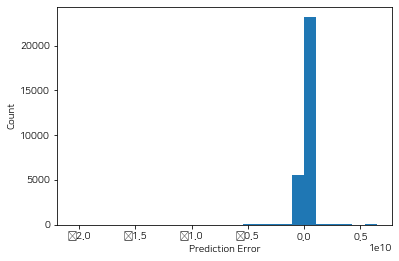

In [157]:
show_prediction_error(test_y, pred_xgb)

In [ ]:
show_prediction_error(test_y, pred_lgbm)

In [439]:
show_mse_rmse(test_y, pred_xgb)

mse : 745130239594332288.000000
rmse: 863209267.555865 



In [440]:
show_mse_rmse(test_y, pred_lgbm)

mse : 625702517495646080.000000
rmse: 791013601.334165 



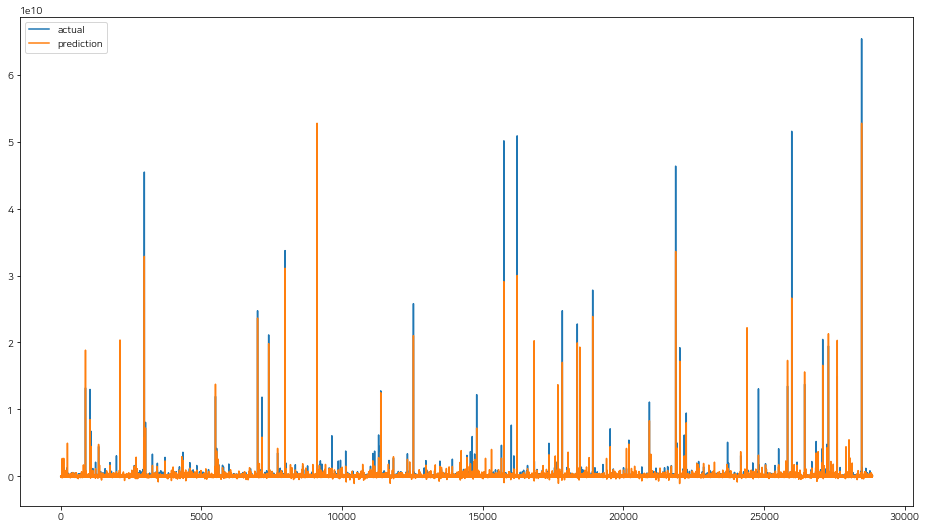

In [390]:
true_y = test_y.to_numpy()
graph(pred_xgb, true_y)

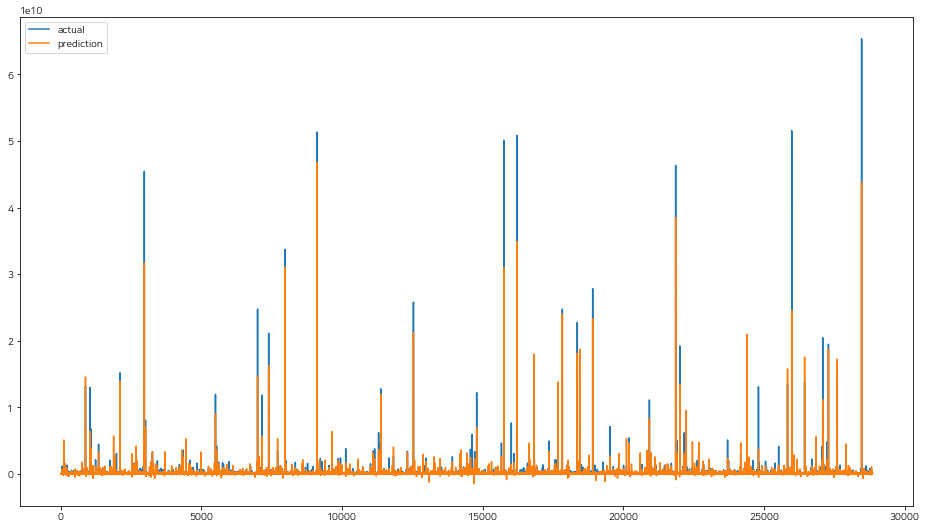

In [391]:
true_y = test_y.to_numpy()
graph(pred_lgbm, true_y)

<AxesSubplot:>

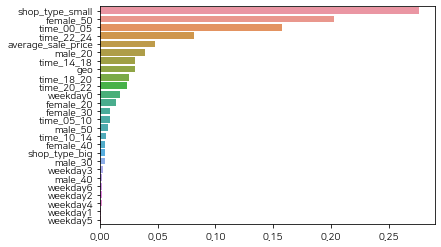

In [323]:
feature_series = pd.Series(data=model_xgb.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

<AxesSubplot:>

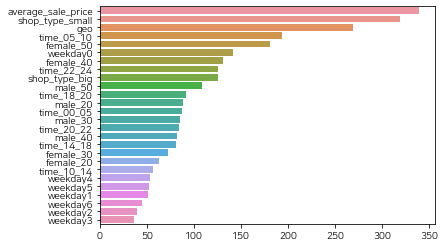

In [324]:
feature_series = pd.Series(data=model_lgbm.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)